## 导入必要的工具包

In [383]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

#查看数据分布是否对称/计算斜度
from scipy.stats import skew

#可视化
import matplotlib.pyplot as plt
import seaborn as sns

#将数据分割训练数据与测试数据
from sklearn.cross_validation import train_test_split

#用来显示图片
from IPython.display import display

# pandas浮点数据输出禁用科学计数法的方式
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

## 读入数据

数据预处理对训练数据和测试数据需进行同样处理，因此将二者一起读入

In [384]:
# 读取训练集的数据
train = pd.read_csv("diabetes.csv")
#显示头5行信息
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Pregnancies : 怀孕次数                                                                                
Glucose:口服葡萄糖耐受试验中，2小时的血浆葡萄糖浓度                                                             
BloodPressure：舒张压（mm Hg）                                                                           
SkinThickness：三头肌皮肤褶层厚度(mm)                                                                      
Insulin：2小时血清胰岛素含量                                                                            
BMI：体重指数                                                                                      
DiabetesPedigreeFunction：糖尿病家族史                                                                     
Age：年龄                                                                                       
Outcome  出现糖尿病为1，否则为0

## 数据探索

#### 查看读入数据的信息

In [385]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


没有发现空值

#### 查看描述信息

In [386]:
#对训练集数据值型特征，用常用统计量观察其分布
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


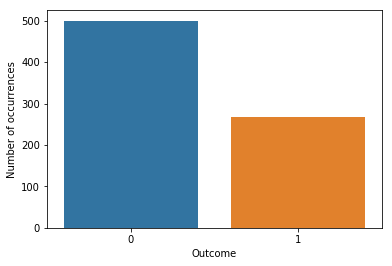

In [387]:
#画出直方图  值是训练集的结果
sns.countplot(train.Outcome);
#定义x轴的名字
pyplot.xlabel('Outcome');
#定义y轴的名字
pyplot.ylabel('Number of occurrences');

给的样本不均匀

## 特征编码

In [388]:
#拿到结果
y_train = train['Outcome']   #形式为0和1
#从训练集中删除 Outcome这两项
train = train.drop(["Outcome"], axis=1)
# 随机采样20%的数据构建测试样本，其余作为训练样本
x_train, x_test, y_train, y_test = train_test_split(train, y_train, random_state=33, test_size=0.2)
#x_train  x轴的训练集
#x_test   x轴的测试集
#y_train  y轴的训练集
#y_test   y轴的测试集
#把训练集变成数组矩阵
x_train = np.array(x_train)
y_train = np.array(y_train).reshape((-1,1))
#把测试集变成数组举证
x_test = np.array(x_test)
y_test = np.array(y_test).reshape((-1,1))

## 数据预处理

In [389]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(x_train)


X_test = ss_y.fit_transform(x_test)


## 正则化的 Logistic Regression及参数调优

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1）                   
目标函数为：J = sum(logloss(f(xi), yi)) + C* penalty                                                            
在sklearn框架下，不同学习器的参数调整步骤相同：                                                               
设置候选参数集合                                                                                    
调用GridSearchCV                                                                                    
调用fit

In [390]:
#导入仪交叉验证
from sklearn.model_selection import GridSearchCV
#导入逻辑回归
from sklearn.linear_model import LogisticRegression
#定义正则函数
penaltys = ['l1','l2']
#定义网格的搜索范围
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#把正则函数和网格的搜索范围变为以个字典
tuned_parameters = dict(penalty = penaltys, C = Cs)
#实例化逻辑回归对象
lr_penalty= LogisticRegression()
#进行交叉验证
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
#lr_penalty 逻辑归回对象
#tuned_parameters  正则番薯和网格的搜索范围
#cv=5  交叉验证的次数
#scoring='neg_log_loss'  评分的标准  负log似然损失函数

#训练数据  
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [391]:
#拿到最好的交叉验证结果
grid.cv_results_

{'mean_fit_time': array([0.00085783, 0.0007792 , 0.00067916, 0.00075078, 0.00092545,
        0.00087762, 0.00100336, 0.00143499, 0.00106459, 0.00099778,
        0.00098076, 0.00105247, 0.00088816, 0.00087738]),
 'mean_score_time': array([0.00066676, 0.00056047, 0.000668  , 0.00054922, 0.00050755,
        0.00053926, 0.00057702, 0.00092034, 0.00069294, 0.00056758,
        0.00048761, 0.00049796, 0.00052485, 0.00051198]),
 'mean_test_score': array([-0.69314718, -0.64214833, -0.6721329 , -0.52844007, -0.48659146,
        -0.47999943, -0.48043621, -0.48017599, -0.4809005 , -0.48086932,
        -0.4809517 , -0.48095123, -0.48095796, -0.48095956]),
 'mean_train_score': array([-0.69314718, -0.6412946 , -0.67079105, -0.52380684, -0.47502501,
        -0.46674403, -0.46228782, -0.46214818, -0.46206766, -0.46206619,
        -0.46206531, -0.4620653 , -0.46206529, -0.46206529]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000

In [392]:
#拿到最好的分数
print(-grid.best_score_)
#获取到最好的参数
print(grid.best_params_)

0.4799994349368312
{'penalty': 'l2', 'C': 0.1}


从上述可以知道   最佳的正则函数是l2  最好的参数是在0.1附近

In [393]:
#定义正则函数
penaltys = ['l2']
#定义网格的搜索范围
Cs = [0.1 * .6, 0.1 * .65, 0.1 * .7, 0.1 * .75, 0.1 * .8, 0.1 * .85, 
                          0.1 * .9, 0.1 * .95, 0.1, 0.1 * 1.05, 0.1 * 1.1, 0.1 * 1.15,
                          0.1 * 1.25, 0.1 * 1.3, 0.1 * 1.35, 0.1 * 1.4]
#把正则函数和网格的搜索范围变为以个字典
tuned_parameters = dict(penalty = penaltys, C = Cs)
#实例化逻辑回归对象
lr_penalty= LogisticRegression()
#进行交叉验证
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
#lr_penalty 逻辑归回对象
#tuned_parameters  正则番薯和网格的搜索范围
#cv=5  交叉验证的次数
#scoring='neg_log_loss'  评分的标准  负log似然损失函数

#训练数据  
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': [0.06, 0.065, 0.06999999999999999, 0.07500000000000001, 0.08000000000000002, 0.085, 0.09000000000000001, 0.095, 0.1, 0.10500000000000001, 0.11000000000000001, 0.11499999999999999, 0.125, 0.13, 0.135, 0.13999999999999999]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [394]:
#拿到最好的交叉验证结果
grid.cv_results_

{'mean_fit_time': array([0.00131693, 0.00098424, 0.00105639, 0.00090761, 0.00156565,
        0.00117602, 0.00106664, 0.00101438, 0.00094018, 0.00103345,
        0.0008781 , 0.00091152, 0.00087709, 0.00172863, 0.00114794,
        0.00090818]),
 'mean_score_time': array([0.00066986, 0.00063825, 0.00055819, 0.00049157, 0.00097613,
        0.00101638, 0.00062556, 0.00060425, 0.00064878, 0.00062857,
        0.00055494, 0.00068974, 0.00054436, 0.00064178, 0.00076284,
        0.00059581]),
 'mean_test_score': array([-0.48302493, -0.48235676, -0.48180988, -0.48135868, -0.4809838 ,
        -0.48067073, -0.48040796, -0.48018673, -0.47999943, -0.47984059,
        -0.47970595, -0.47959154, -0.47941162, -0.47934145, -0.47928202,
        -0.47923182]),
 'mean_train_score': array([-0.47170286, -0.47071889, -0.46988304, -0.46916625, -0.4685464 ,
        -0.46800636, -0.46753272, -0.4671148 , -0.46674403, -0.4664134 ,
        -0.4661173 , -0.46585098, -0.46539259, -0.46519447, -0.46501378,
        -0.4

In [395]:
#拿到最好的分数
print(-grid.best_score_)
#获取到最好的参数
print(grid.best_params_)

0.47923181810244786
{'penalty': 'l2', 'C': 0.13999999999999999}


从上述查看  参数在0.139  就是0.14之间

In [396]:
#定义正则函数
penaltys = ['l2']
#定义网格的搜索范围
Cs = [0.2 * .6, 0.2 * .65, 0.2 * .7, 0.2 * .75, 0.2 * .8, 0.2 * .85, 
                          0.2 * .9, 0.2 * .95, 0.2, 0.2 * 1.05, 0.2 * 1.1, 0.2 * 1.15,
                          0.2 * 1.25, 0.2 * 1.3, 0.2 * 1.35, 0.2 * 1.4]
#把正则函数和网格的搜索范围变为以个字典
tuned_parameters = dict(penalty = penaltys, C = Cs)
#实例化逻辑回归对象
lr_penalty= LogisticRegression()
#进行交叉验证
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
#lr_penalty 逻辑归回对象
#tuned_parameters  正则番薯和网格的搜索范围
#cv=5  交叉验证的次数
#scoring='neg_log_loss'  评分的标准  负log似然损失函数

#训练数据  
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': [0.12, 0.13, 0.13999999999999999, 0.15000000000000002, 0.16000000000000003, 0.17, 0.18000000000000002, 0.19, 0.2, 0.21000000000000002, 0.22000000000000003, 0.22999999999999998, 0.25, 0.26, 0.27, 0.27999999999999997]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [397]:
#拿到最好的交叉验证结果
grid.cv_results_

{'mean_fit_time': array([0.00115099, 0.00090175, 0.00109015, 0.00100102, 0.00089707,
        0.00102563, 0.00088396, 0.00088024, 0.00095239, 0.00132332,
        0.00094528, 0.00090876, 0.00091195, 0.00089517, 0.00084224,
        0.00098357]),
 'mean_score_time': array([0.00076666, 0.00060806, 0.00064764, 0.00058298, 0.00050278,
        0.00055766, 0.00052781, 0.00051298, 0.00070124, 0.00106015,
        0.00056777, 0.00059662, 0.00052047, 0.00052857, 0.00063963,
        0.00053616]),
 'mean_test_score': array([-0.47949428, -0.47934145, -0.47923182, -0.47915431, -0.47910097,
        -0.47906599, -0.47904549, -0.47903547, -0.47903368, -0.47903834,
        -0.47904828, -0.47906178, -0.47909649, -0.47911689, -0.47913876,
        -0.47916132]),
 'mean_train_score': array([-0.4656105 , -0.46519447, -0.46484851, -0.46455756, -0.46431044,
        -0.46409868, -0.46391572, -0.46375667, -0.46361741, -0.4634948 ,
        -0.46338622, -0.46328966, -0.46312598, -0.46305624, -0.46299319,
        -0.4

In [398]:
#拿到最好的分数
print(-grid.best_score_)
#获取到最好的参数
print(grid.best_params_)

0.4790336837209894
{'penalty': 'l2', 'C': 0.2}


已经符合  但是分数相对低

### 线性SVM正则参数调优

线性SVM LinearSVC的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_val、y_val）来估计模型性能

In [399]:
from sklearn.svm import LinearSVC
#定义一个校验的方法
def fit_grid_point_Linear(C, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC2 =  LinearSVC( C = C)
    #训练
    SVC2 = SVC2.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC2.score(X_val, y_val)
    #输出分数
    print("accuracy: {}".format(accuracy))
    return accuracy

In [400]:
#需要调优的参数
C_s = np.logspace(-3, 3, 7)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份  
#penalty_s = ['l1','l2']

#定义一个列表
accuracy_s = []
for i, oneC in enumerate(C_s):
#    for j, penalty in enumerate(penalty_s):
    #调用训练的方法
    tmp = fit_grid_point_Linear(oneC, X_train, y_train, X_test, y_test)
    #oneC   传进去10的多少次方
    #X_train  x轴的训练集
    #y_train  y轴的结果集
    #X_val   结果的测试集
    #y_val  y的结果集
    accuracy_s.append(tmp)

accuracy: 0.720779220779
accuracy: 0.733766233766
accuracy: 0.74025974026
accuracy: 0.746753246753
accuracy: 0.74025974026
accuracy: 0.753246753247
accuracy: 0.506493506494


参数越大  分数越低   要相对调小分数

In [401]:
#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份  
#penalty_s = ['l1','l2']

#定义一个列表
accuracy_s = []
for i, oneC in enumerate(C_s):
#    for j, penalty in enumerate(penalty_s):
    #调用训练的方法
    tmp = fit_grid_point_Linear(oneC, X_train, y_train, X_test, y_test)
    #oneC   传进去10的多少次方
    #X_train  x轴的训练集
    #y_train  y轴的结果集
    #X_val   结果的测试集
    #y_val  y的结果集
    accuracy_s.append(tmp)

accuracy: 0.733766233766
accuracy: 0.74025974026
accuracy: 0.746753246753
accuracy: 0.74025974026
accuracy: 0.746753246753


In [402]:
#需要调优的参数
C_s = np.logspace(-4,0 ,5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份  
#penalty_s = ['l1','l2']

#定义一个列表
accuracy_s = []
for i, oneC in enumerate(C_s):
#    for j, penalty in enumerate(penalty_s):
    #调用训练的方法
    tmp = fit_grid_point_Linear(oneC, X_train, y_train, X_test, y_test)
    #oneC   传进去10的多少次方
    #X_train  x轴的训练集
    #y_train  y轴的结果集
    #X_val   结果的测试集
    #y_val  y的结果集
    accuracy_s.append(tmp)

accuracy: 0.714285714286
accuracy: 0.720779220779
accuracy: 0.733766233766
accuracy: 0.74025974026
accuracy: 0.746753246753


目前 0已经是最好的分数了  0.746753246753

svm的性能相对来说比logstic性能稍微好一些  svm省了调整正则函数的一项  直接调整正则参数即可

### RBF核SVM正则参数调优

RBF核是SVM最常用的核函数。
RBF核SVM 的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和核函数的宽度gamma
C越小，决策边界越平滑； 
gamma越小，决策边界越平滑。

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_test、y_test）来估计模型性能

In [403]:
from sklearn.svm import SVC
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    # C = C  惩罚参数
    # kernel='rbf'  核函数
    # gamma = gamma  单个训练样本影响的范围
    
    #训练
    SVC3 = SVC3.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC3.score(X_val, y_val)
    #输出各个分数
    print("accuracy: {}".format(accuracy))
    return accuracy

In [404]:
#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 

#设置单个样本影响的范围
gamma_s = np.logspace(-2, 2, 5)  

#定义一个列表
accuracy_s = []
#循环放入参数
for i, oneC in enumerate(C_s):
    #每一次放入样本的影响范围
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        #oneC  惩罚参数
        #gamma  样本的影响范围
        #X_train  x轴的训练集
        #y_train  y轴的结果集
        #X_val  x轴的测试集
        #y_val  y轴的结果集
        #把结果放到列表中
        accuracy_s.append(tmp)



accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.701298701299
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.733766233766
accuracy: 0.74025974026
accuracy: 0.675324675325
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.74025974026
accuracy: 0.701298701299
accuracy: 0.688311688312
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.753246753247
accuracy: 0.681818181818
accuracy: 0.688311688312
accuracy: 0.642857142857
accuracy: 0.642857142857


调整gamma_s

In [405]:
#需要调优的参数
C_s = np.logspace(-4, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 

#设置单个样本影响的范围
gamma_s = np.logspace(-4, 2, 7)  

#定义一个列表
accuracy_s = []
#循环放入参数
for i, oneC in enumerate(C_s):
    #每一次放入样本的影响范围
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        #oneC  惩罚参数
        #gamma  样本的影响范围
        #X_train  x轴的训练集
        #y_train  y轴的结果集
        #X_val  x轴的测试集
        #y_val  y轴的结果集
        #把结果放到列表中
        accuracy_s.append(tmp)


accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.701298701299
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.655844155844
accuracy: 0.733766233766
accuracy: 0.74025974026
accuracy: 0.675324675325
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.655844155844
accuracy: 0.727272727273
accuracy: 0.74025974026
accuracy: 0.701298701299
accuracy: 0.688311688312
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.727272727273
accuracy: 0.753246753247
accuracy: 0.753246753247
accuracy: 0.681818181818
accuracy: 0.688311688312
accuracy: 0.642857142857
accuracy: 0.642857142857


In [406]:
#需要调优的参数
C_s = np.logspace(-4, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 

#设置单个样本影响的范围
gamma_s = np.logspace(-4, 4, 9)  

#定义一个列表
accuracy_s = []
#循环放入参数
for i, oneC in enumerate(C_s):
    #每一次放入样本的影响范围
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        #oneC  惩罚参数
        #gamma  样本的影响范围
        #X_train  x轴的训练集
        #y_train  y轴的结果集
        #X_val  x轴的测试集
        #y_val  y轴的结果集
        #把结果放到列表中
        accuracy_s.append(tmp)


accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.701298701299
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.733766233766
accuracy: 0.74025974026
accuracy: 0.707792207792
accuracy: 0.714285714286
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.727272727273
accuracy: 0.753246753247
accuracy: 0.753246753247
accuracy: 0.681818181818
a

In [407]:
#需要调优的参数
C_s = np.logspace(-4, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 

#设置单个样本影响的范围
gamma_s = np.logspace(-1, 1, 3)  

#定义一个列表
accuracy_s = []
#循环放入参数
for i, oneC in enumerate(C_s):
    #每一次放入样本的影响范围
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        #oneC  惩罚参数
        #gamma  样本的影响范围
        #X_train  x轴的训练集
        #y_train  y轴的结果集
        #X_val  x轴的测试集
        #y_val  y轴的结果集
        #把结果放到列表中
        accuracy_s.append(tmp)


accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.701298701299
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.707792207792
accuracy: 0.714285714286
accuracy: 0.642857142857
accuracy: 0.681818181818
accuracy: 0.688311688312
accuracy: 0.642857142857


In [408]:
#需要调优的参数
C_s = np.logspace(-4, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 

#设置单个样本影响的范围
gamma_s = np.logspace(-6, 6, 13)  

#定义一个列表
accuracy_s = []
#循环放入参数
for i, oneC in enumerate(C_s):
    #每一次放入样本的影响范围
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        #oneC  惩罚参数
        #gamma  样本的影响范围
        #X_train  x轴的训练集
        #y_train  y轴的结果集
        #X_val  x轴的测试集
        #y_val  y轴的结果集
        #把结果放到列表中
        accuracy_s.append(tmp)


accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.701298701299
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857


In [409]:
#需要调优的参数
C_s = np.logspace(-4, 2, 3)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 

#设置单个样本影响的范围
gamma_s = np.logspace(-6, 6, 2)  

#定义一个列表
accuracy_s = []
#循环放入参数
for i, oneC in enumerate(C_s):
    #每一次放入样本的影响范围
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        #oneC  惩罚参数
        #gamma  样本的影响范围
        #X_train  x轴的训练集
        #y_train  y轴的结果集
        #X_val  x轴的测试集
        #y_val  y轴的结果集
        #把结果放到列表中
        accuracy_s.append(tmp)


accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857


In [415]:
#需要调优的参数
C_s = np.logspace(-4, 3, 3)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 

#设置单个样本影响的范围
gamma_s = np.logspace(-2, 3, 3)  

#定义一个列表
accuracy_s = []
#循环放入参数
for i, oneC in enumerate(C_s):
    #每一次放入样本的影响范围
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        #oneC  惩罚参数
        #gamma  样本的影响范围
        #X_train  x轴的训练集
        #y_train  y轴的结果集
        #X_val  x轴的测试集
        #y_val  y轴的结果集
        #把结果放到列表中
        accuracy_s.append(tmp)


accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.733766233766
accuracy: 0.642857142857
accuracy: 0.642857142857
accuracy: 0.720779220779
accuracy: 0.616883116883
accuracy: 0.642857142857


这个调优  根据什么来调的呢?找了好久都招不出